In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import IPython.display as ipd
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import save_model
from tensorflow.keras.regularizers import l1, l2
from sklearn import metrics

2023-11-16 03:53:54.043883: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 03:53:54.423316: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 03:53:54.423348: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 03:53:54.425615: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 03:53:54.649328: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 03:53:54.651598: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
# Load data 
df = pd.read_csv('UrbanSound8K.csv')

df

slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   
8731     99812-1-6-0.wav   99812  332.289233  334.821332         2     7   

      classID             class  
0           3          dog_bark  
1           2  children_playing  
2           2  children_playing  
3           2  children_playing  
4           2  children_playing  
...       ...               ...  
8727        1          car_horn  
8728        1          car_horn  
8729        1          car_horn  
8730        1          car_horn  
8731        1          car_horn  

[8732 rows x 8 columns]

In [3]:
df.shape # 8732 rows and 8 columns

(8732, 8)

In [4]:
df['class'].value_counts() # we have few data for gun_shot

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [5]:
df['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [6]:
dict_class_path = {
    "dog_bark": [], 'children_playing': [], 'air_conditioner': [], 'street_music': [],
    'engine_idling': [], 'jackhammer': [], 'drilling': [], 'siren': [], 
    'car_horn': [], 'gun_shot': []
}

In [7]:
for i in range(len(df)):

    cat_class = str(df['class'][i])
    file_path = "data/fold" + str(df['fold'][i])+ "/" + str(df['slice_file_name'][i])

    if file_path not in dict_class_path.get(cat_class):

        if cat_class in dict_class_path:

            dict_class_path[cat_class].append(file_path)
        else:
            
            dict_class_path[cat_class] = [file_path]

In [8]:
# Check the lenght for each class compared to the dataframe

for i in dict_class_path:
    print(f"{i} : {len(dict_class_path[i])}")

dog_bark : 1000
children_playing : 1000
air_conditioner : 1000
street_music : 1000
engine_idling : 1000
jackhammer : 1000
drilling : 1000
siren : 929
car_horn : 429
gun_shot : 374


In [9]:
df['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


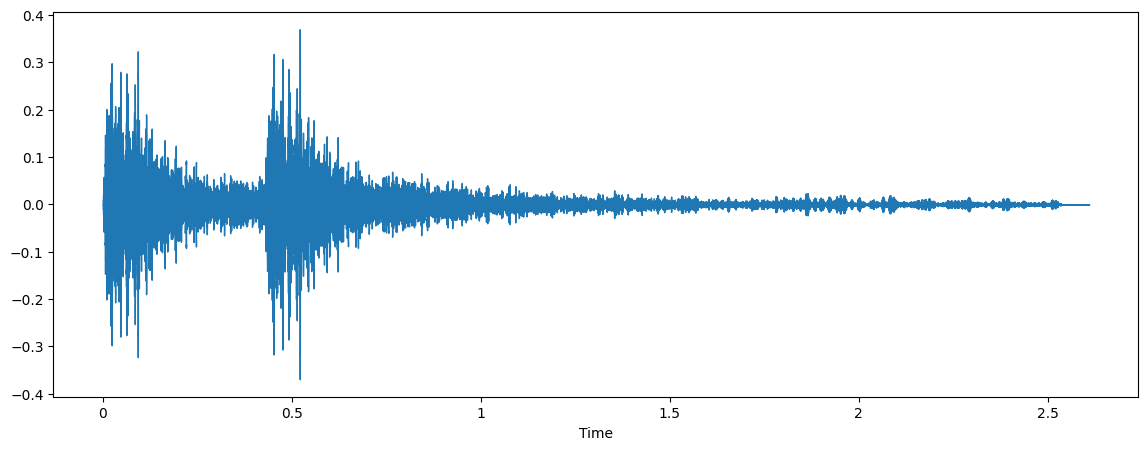

In [11]:
plt.figure(figsize=(14, 5))

data, sample_rate = librosa.load(dict_class_path['gun_shot'][0])
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(dict_class_path['gun_shot'][0])

In [12]:
df

slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   
8731     99812-1-6-0.wav   99812  332.289233  334.821332         2     7   

      classID             class  
0           3          dog_bark  
1           2  children_playing  
2           2  children_playing  
3           2  children_playing  
4           2  children_playing  
...       ...               ...  
8727        1          car_horn  
8728        1          car_horn  
8729        1          car_horn  
8730        1          car_horn  
8731        1          car_horn  

[8732 rows x 8 columns]

In [13]:
df['path'] = "data/fold" + df['fold'].astype(str) + "/" + df['slice_file_name'].astype(str)

In [14]:
df

slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   
8731     99812-1-6-0.wav   99812  332.289233  334.821332         2     7   

      classID             class                           path  
0           3          dog_bark    data/fold5/100032-3-0-0.wav  
1           2  children_playing  data/fold5/100263-2-0-117.wav  
2           2  children_playing  data/fold5/100263-2-0-121.wav  
3           2  children_playing  data/fold5/100263-2-0-126.wav  
4           2  children_playing  data/fold5/100263-2-0-137.wav  
...       ...               ...                            ...  
8727        1          car_horn     data/fold7/99812-1-2-0.wav  
8728        1          car_horn     data/fold7/99812-1-3-0.wav  
8729        1          car_horn     data/fold7/99812-1-4-0.wav  
8730        1          car_horn     data/fold7/99812-1-5-0.wav  
8731        1          car_horn     data/fold7/99812-1-6-0.wav  

[8732 rows x 9 columns]

# Audio Data Exploration

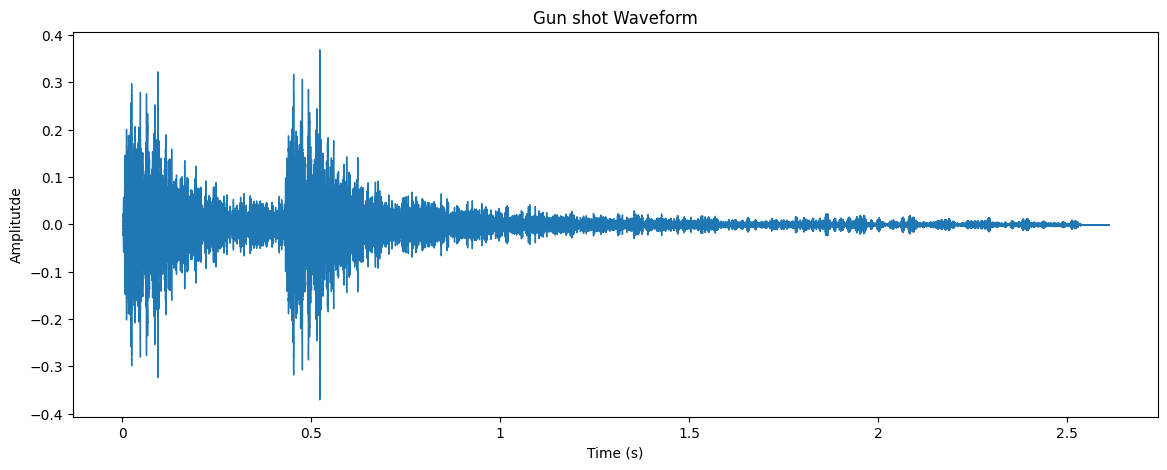

In [15]:
plt.figure(figsize=(14, 5))

audio_data, sample_rate = librosa.load(dict_class_path["gun_shot"][0])
librosa.display.waveshow(data, sr=sample_rate)

plt.title("Gun shot Waveform")
plt.xlabel("Time (s)")
plt.ylabel('Amplitutde')

ipd.Audio(dict_class_path["gun_shot"][0])

In [16]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref = np.max)
D.shape # (1025, 113)
D

array([[-2.4610462e+01, -1.2005539e+01, -2.0033672e+01, ...,
        -6.3154259e+01, -8.0000000e+01, -8.0000000e+01],
       [-1.7583460e+01, -1.1722874e+01, -5.3983650e+00, ...,
        -5.7548103e+01, -8.0000000e+01, -8.0000000e+01],
       [-1.0275238e+01, -3.3025475e+00, -3.8146973e-06, ...,
        -5.2712097e+01, -8.0000000e+01, -8.0000000e+01],
       ...,
       [-8.0000000e+01, -8.0000000e+01, -8.0000000e+01, ...,
        -8.0000000e+01, -8.0000000e+01, -8.0000000e+01],
       [-8.0000000e+01, -8.0000000e+01, -8.0000000e+01, ...,
        -8.0000000e+01, -8.0000000e+01, -8.0000000e+01],
       [-8.0000000e+01, -8.0000000e+01, -8.0000000e+01, ...,
        -8.0000000e+01, -8.0000000e+01, -8.0000000e+01]], dtype=float32)

Text(0.5, 1.0, 'Spectogram')

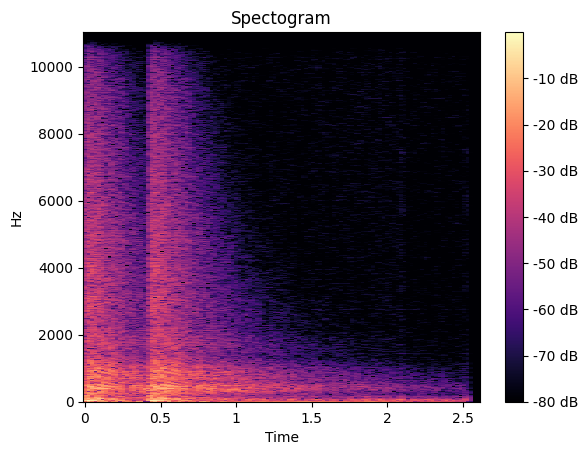

In [17]:
librosa.display.specshow(D, y_axis='linear', x_axis="time")
plt.colorbar(format = "%+2.0f dB")

plt.title("Spectogram")

/tmp/ipykernel_1709/2510971612.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,15))


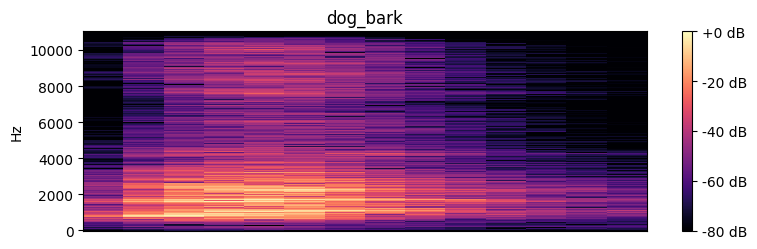

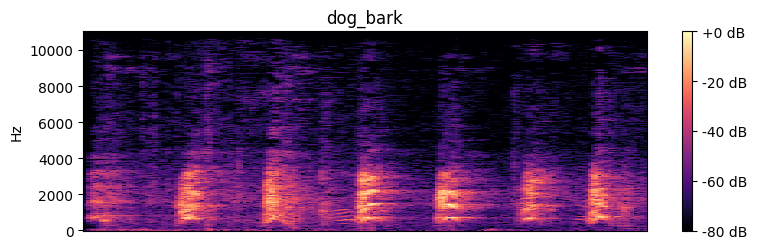

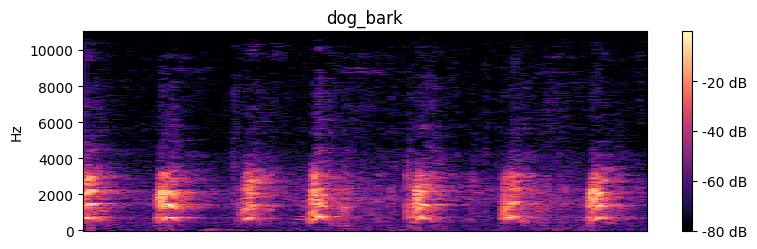

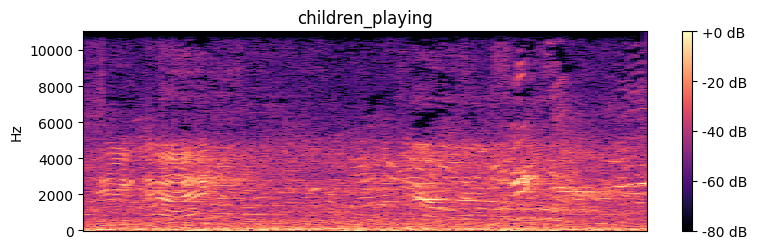

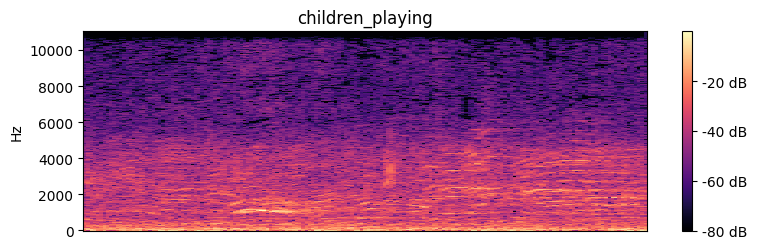

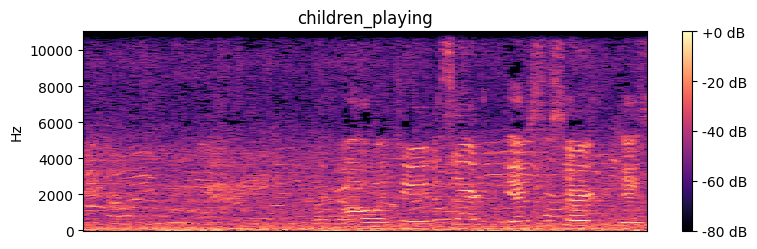

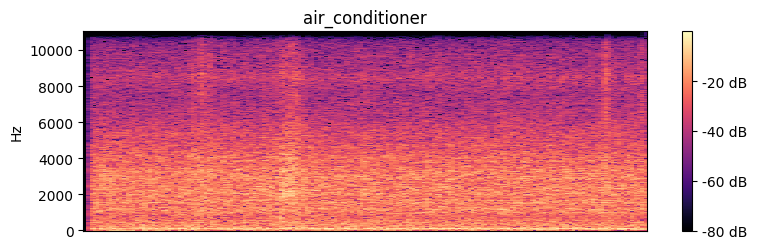

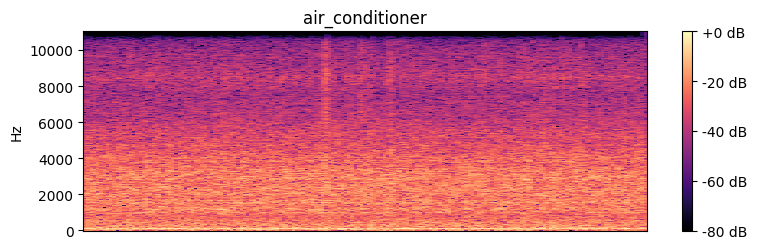

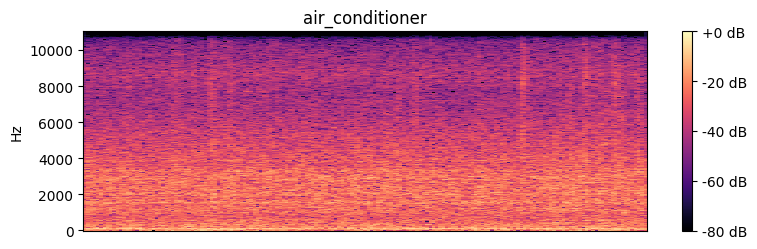

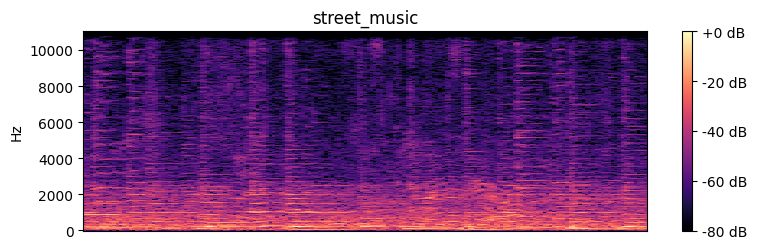

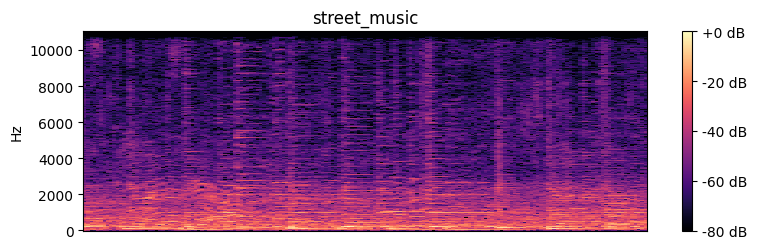

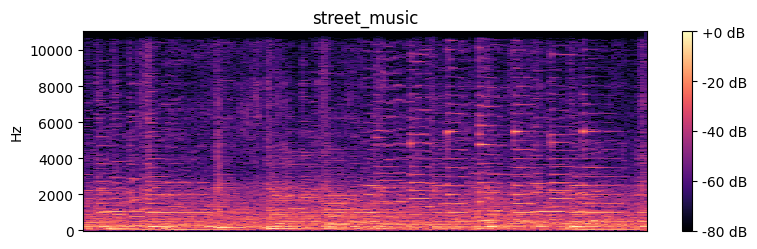

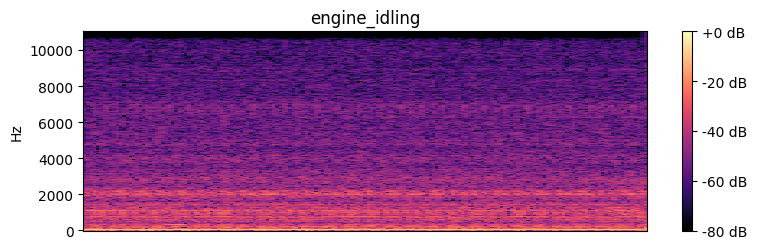

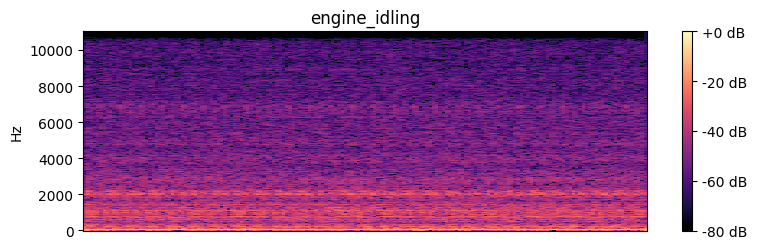

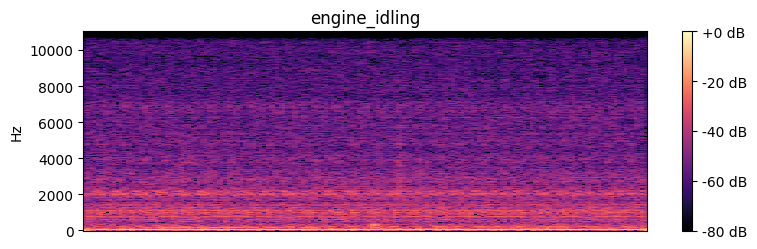

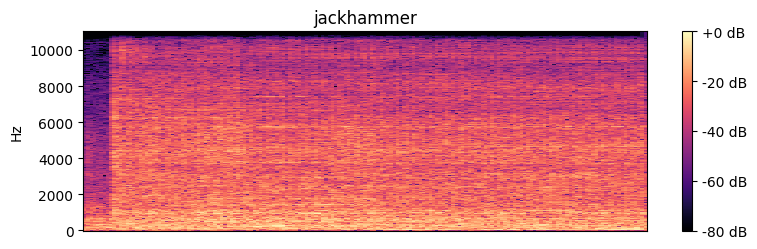

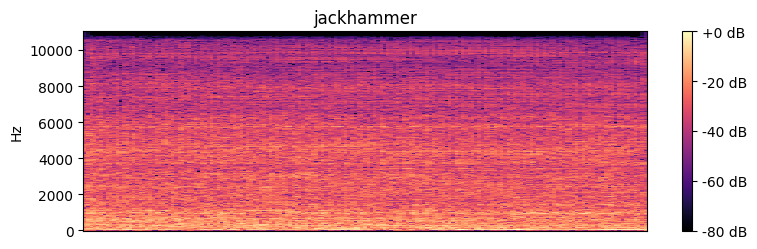

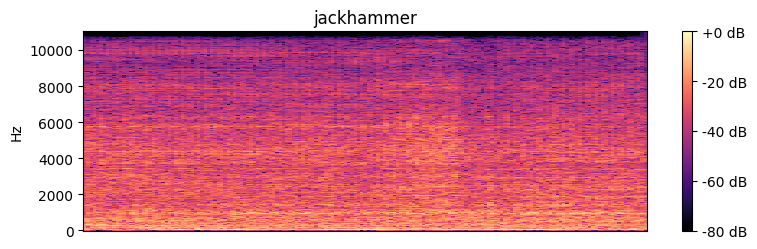

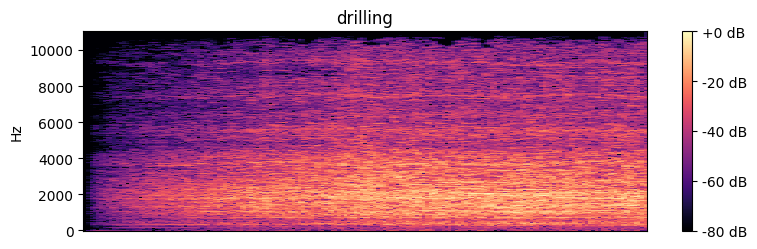

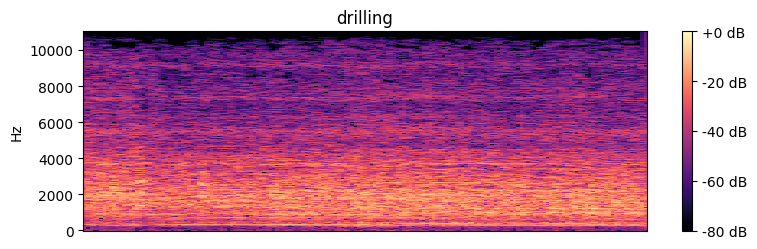

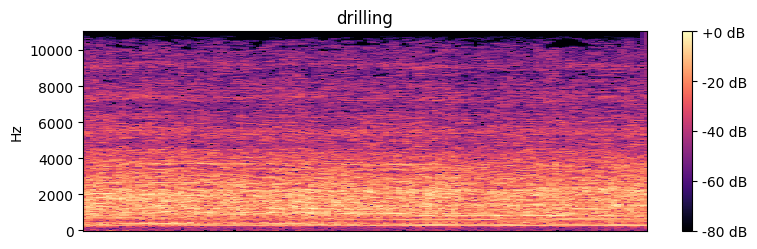

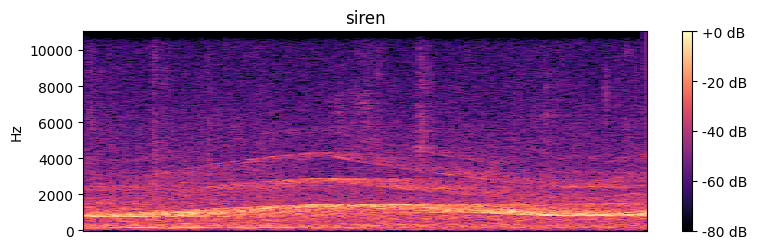

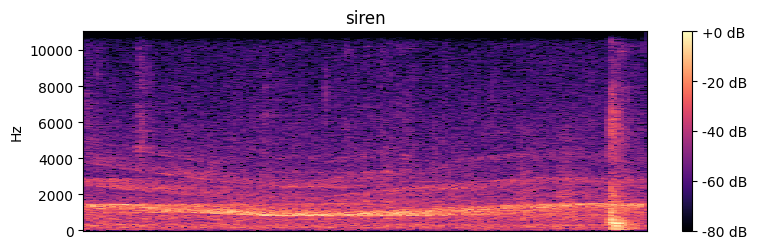

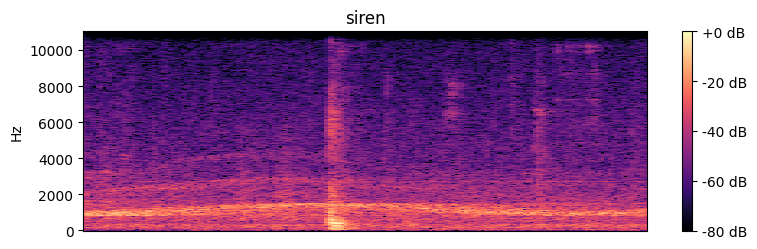

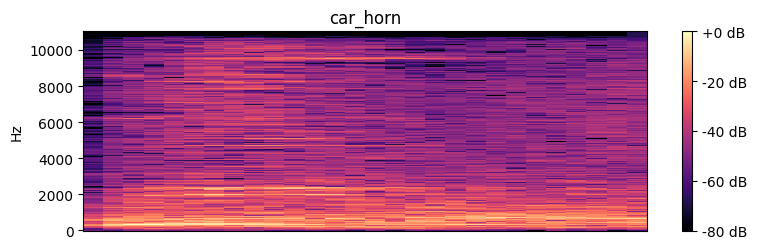

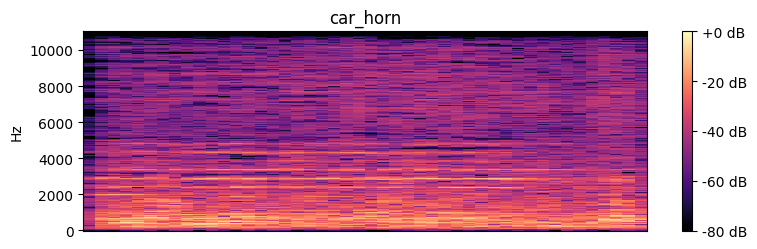

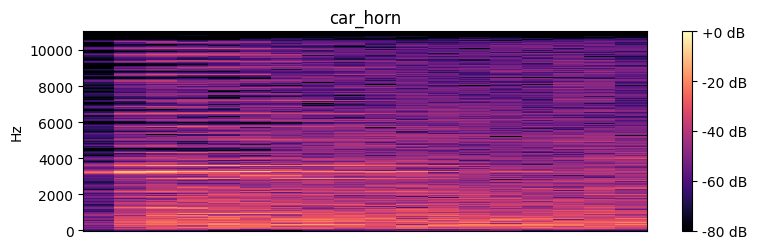

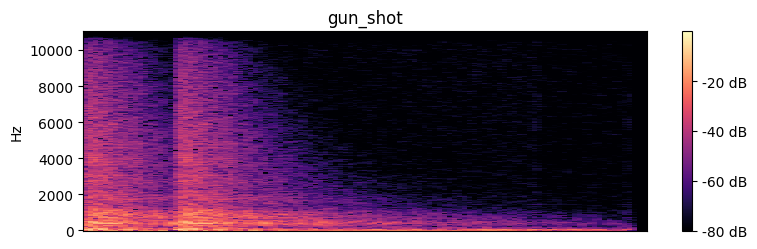

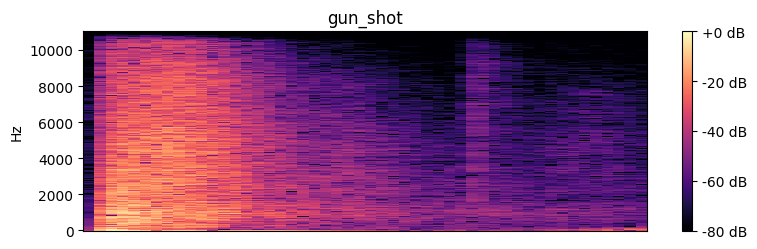

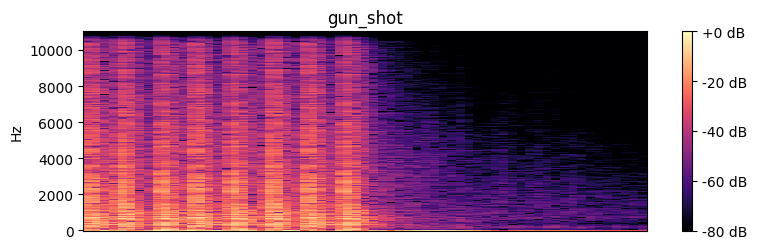

In [18]:
for i in dict_class_path:
    for j in range(3):
        
        #print(f"{i} : {dict_class_path[i][j]}")
        audio_data, sample_rate = librosa.load(dict_class_path[i][j])
        plt.figure(figsize=(20,15))
        D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref = np.max)
        plt.subplot(5, 2, 1)
        librosa.display.specshow(D, y_axis='linear')
        plt.colorbar(format = '%+2.0f dB')
        plt.title(i)


### Mel-frequency spectrogram

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

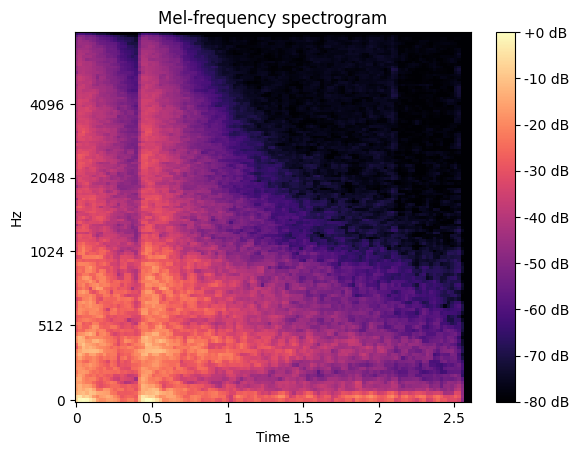

In [19]:
audio_data, sample_rate = librosa.load(dict_class_path["gun_shot"][0])
mel = librosa.feature.melspectrogram(y = audio_data, sr = sample_rate)

ipd.Audio(data=audio_data, rate=sample_rate)

fig, ax = plt.subplots()

S_dB = librosa.power_to_db(mel, ref= np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sample_rate, fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [20]:
mel.shape

(128, 113)

# Features Extraction using Mel-Frequency

In [21]:
def get_feature(audiofile):

    X, sample_rate = librosa.load(audiofile, res_type='kaiser_fast')
    mel_frequency = np.mean(librosa.feature.melspectrogram(y = X, sr = sample_rate).T, axis=0)
    
    return mel_frequency

In [22]:
# Get the features from the dataframe

features = []

for i in df.index:

    audiofile = df['path'][i]
    audiofile_class = df['class'][i]

    data = get_feature(audiofile)

    features.append([data, audiofile_class])

/home/tmenouer/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/home/tmenouer/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/home/tmenouer/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [23]:
# Create a new Dataframe with the features extracted

mel_frequency_data = pd.DataFrame(features, columns=['features','class'])

mel_frequency_data # 8732 rows like the first dataframe and 2 columns now

features             class
0     [2.3283628e-05, 0.00021359067, 0.0002844038, 0...          dog_bark
1     [0.049608395, 0.049436085, 0.03691951, 0.02867...  children_playing
2     [0.030883823, 0.027941372, 0.036278624, 0.0257...  children_playing
3     [0.026432991, 0.032280095, 0.04545298, 0.03293...  children_playing
4     [0.06138195, 0.040278364, 0.02294883, 0.015539...  children_playing
...                                                 ...               ...
8727  [0.017539999, 0.033781983, 0.02726127, 0.03459...          car_horn
8728  [0.0088033015, 0.019734537, 0.016589222, 0.008...          car_horn
8729  [0.016069045, 0.06248836, 0.06208313, 0.064028...          car_horn
8730  [0.024163222, 0.07749511, 0.06344367, 0.032645...          car_horn
8731  [0.036213387, 0.054086257, 0.09466025, 0.09760...          car_horn

[8732 rows x 2 columns]

In [24]:
mel_frequency_data['features'][0]

array([2.32836283e-05, 2.13590669e-04, 2.84403795e-04, 5.38103399e-04,
       4.95406217e-04, 1.08277681e-03, 5.19937417e-03, 3.59481527e-03,
       3.03656352e-03, 1.16137101e-03, 6.67813991e-04, 1.55336515e-03,
       1.70633418e-03, 1.82606175e-03, 3.10368440e-03, 9.18751303e-03,
       6.59603253e-03, 4.65298910e-03, 1.57605689e-02, 3.37747149e-02,
       1.05524205e-01, 3.38305801e-01, 2.80945718e-01, 3.69583160e-01,
       1.71591544e+00, 6.54988146e+00, 2.72619867e+00, 4.23764563e+00,
       5.75704861e+00, 1.17805052e+01, 3.51552963e+01, 4.23007278e+01,
       5.75337219e+01, 1.75374851e+01, 1.13725128e+01, 1.45382452e+01,
       8.21350098e+00, 5.46533108e+00, 1.78669472e+01, 3.90507698e+01,
       1.45197744e+01, 1.98418255e+01, 1.02103891e+01, 5.77536154e+00,
       1.82384872e+00, 1.47172475e+00, 1.66592813e+00, 1.40164554e+00,
       2.94289756e+00, 7.24785280e+00, 3.97097039e+00, 1.76488304e+00,
       1.71261883e+00, 3.65596128e+00, 2.84417009e+00, 1.72199898e+01,
      

In [25]:
mel_frequency_data['features'][0].shape

(128,)

# Audio Preprocessing

In [26]:
# Split the data

X = np.array(mel_frequency_data['features'].tolist()) # Data features
y = np.array(mel_frequency_data['class'].tolist()) # Target

X.shape, y.shape # Check the shape

((8732, 128), (8732,))

In [27]:
le = LabelEncoder()
y = to_categorical(le.fit_transform(y)) # Convert categorial labels into numerical labels.

X.shape, y.shape

((8732, 128), (8732, 10))

### Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6985, 128), (1747, 128), (6985, 10), (1747, 10))

### Model creation

In [350]:
def model(dim, nb_labels):
    
    model = Sequential()

    # first layer
    model.add(Dense(1000, input_shape=(dim,), activation = "relu", kernel_regularizer=l2(0.001)))

    model.add(Dense(850, activation = "relu"))

    model.add(Dense(500, activation = "relu"))
    
    model.add(Dense(400, activation = "relu"))

    model.add(Dense(200, activation = "relu"))

    model.add(Dense(50, activation = "relu"))

    model.add(Dropout(0.2))

    # final layer
    model.add(Dense(nb_labels, activation = 'softmax'))

    return model

In [351]:
model = model(X.shape[1], y.shape[1])
model.summary()


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_139 (Dense)           (None, 1000)              129000    
                                                                 
 dense_140 (Dense)           (None, 850)               850850    
                                                                 
 dense_141 (Dense)           (None, 500)               425500    
                                                                 
 dense_142 (Dense)           (None, 400)               200400    
                                                                 
 dense_143 (Dense)           (None, 200)               80200     
                                                                 
 dense_144 (Dense)           (None, 50)                10050     
                                                                 
 dropout_25 (Dropout)        (None, 50)              

In [352]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [353]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), batch_size = 500 ,epochs = 200, verbose=1)

Epoch 1/200


14/14 [==============================] - 2s 65ms/step - loss: 2.6990 - accuracy: 0.1934 - val_loss: 2.3295 - val_accuracy: 0.2816
Epoch 2/200
14/14 [==============================] - 1s 50ms/step - loss: 2.3478 - accuracy: 0.2425 - val_loss: 2.2722 - val_accuracy: 0.3194
Epoch 3/200
14/14 [==============================] - 1s 48ms/step - loss: 2.2530 - accuracy: 0.2926 - val_loss: 2.1701 - val_accuracy: 0.3698
Epoch 4/200
14/14 [==============================] - 1s 49ms/step - loss: 2.1460 - accuracy: 0.3353 - val_loss: 2.0759 - val_accuracy: 0.3984
Epoch 5/200
14/14 [==============================] - 1s 50ms/step - loss: 2.0403 - accuracy: 0.3621 - val_loss: 1.9468 - val_accuracy: 0.4224
Epoch 6/200
14/14 [==============================] - 1s 49ms/step - loss: 1.9099 - accuracy: 0.3928 - val_loss: 1.8227 - val_accuracy: 0.4522
Epoch 7/200
14/14 [==============================] - 1s 50ms/step - loss: 1.7558 - accuracy: 0.4553 - val_loss: 1.7273 - val_accuracy: 0.4906
Epoch 8/200
14/14 

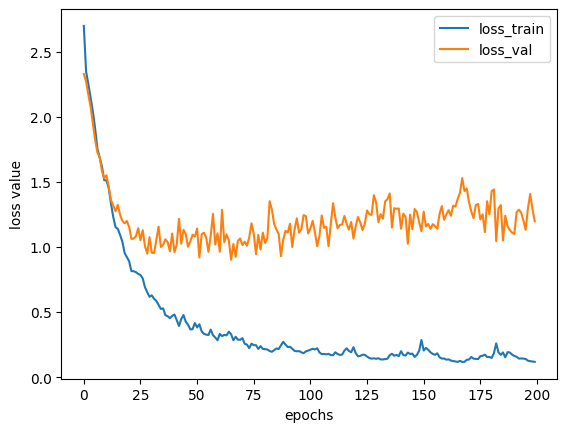

In [354]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']

plt.plot(loss_train,label = 'loss_train')
plt.plot(loss_val,label = 'loss_val')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend()

In [355]:
loss, acc = model.evaluate(X_test,y_test)

55/55 [==============================] - 0s 5ms/step - loss: 1.1978 - accuracy: 0.8357


In [356]:
def prediction_audio(audiofile, model):

    audio_data, sample_rate = librosa.load(audiofile, res_type='kaiser_fast')
    mel_frequency = np.mean(librosa.feature.melspectrogram(y = audio_data, sr = sample_rate).T, axis=0) # (128,)

    X = mel_frequency.reshape(1, -1) # (1, 128)
    
    predicted_label = np.argmax(model.predict(X), axis=-1)
    predicted_class = le.inverse_transform(predicted_label)

    print(f"Label predicted : {predicted_class[0]}")

    return predicted_class[0]

In [357]:
# The model is tested with data that he doesn't know
# All audio file tested is a gun shot ( assault rifle mostly)

correct = 0
incorrect = 0
for i in range(1, 101):

    if prediction_audio(f"gun_shots/IMI Desert Eagle/2 ({i}).wav", model) == 'gun_shot':
        correct += 1
    else: 
        incorrect += 1

    
print(f"Correct : {correct}")
print(f"Incorrect : {incorrect}")

1/1 [==============================] - 0s 102ms/step
Label predicted : children_playing
1/1 [==============================] - 0s 39ms/step
Label predicted : children_playing
1/1 [==============================] - 0s 32ms/step
Label predicted : children_playing
1/1 [==============================] - 0s 34ms/step
Label predicted : children_playing
1/1 [==============================] - 0s 36ms/step
Label predicted : children_playing
1/1 [==============================] - 0s 43ms/step
Label predicted : children_playing
1/1 [==============================] - 0s 26ms/step
Label predicted : jackhammer
1/1 [==============================] - 0s 33ms/step
Label predicted : jackhammer
1/1 [==============================] - 0s 26ms/step
Label predicted : jackhammer
1/1 [==============================] - 0s 37ms/step
Label predicted : jackhammer
1/1 [==============================] - 0s 40ms/step
Label predicted : jackhammer
1/1 [==============================] - 0s 40ms/step
Label predicted : ja

In [358]:
# The model is tested with data that he doesn't know
# All audio file tested is a gun shot ( assault rifle mostly)

correct = 0
incorrect = 0
for i in range(1, 73):

    if prediction_audio(f"gun_shots/AK-47/1 ({i}).wav", model) == 'gun_shot':
        correct += 1
    else: 
        incorrect += 1

    
print(f"Correct : {correct}")
print(f"Incorrect : {incorrect}")

1/1 [==============================] - 0s 45ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 51ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 44ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 34ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 41ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 42ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 51ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 43ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 50ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 45ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 45ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 38ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 36ms/step


In [359]:
# The model is tested with data that he doesn't know
# All audio file tested is a gun shot ( assault rifle mostly)

correct = 0
incorrect = 0
for i in range(1, 99):

    if prediction_audio(f"gun_shots/AK-12/3 ({i}).wav", model) == 'gun_shot':
        correct += 1
    else: 
        incorrect += 1

    
print(f"Correct : {correct}")
print(f"Incorrect : {incorrect}")

1/1 [==============================] - 0s 30ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 47ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 41ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 33ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 43ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 40ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 43ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 44ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 44ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 32ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 47ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 42ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 30ms/step


In [360]:
# The model is tested with data that he doesn't know
# All audio file tested is a gun shot ( assault rifle mostly)

correct = 0
incorrect = 0
for i in range(1, 100):

    if prediction_audio(f"gun_shots/MP5/8 ({i}).wav", model) == 'gun_shot':
        correct += 1
    else: 
        incorrect += 1

    
print(f"Correct : {correct}")
print(f"Incorrect : {incorrect}")

1/1 [==============================] - 0s 27ms/step
Label predicted : jackhammer
1/1 [==============================] - 0s 43ms/step
Label predicted : jackhammer
1/1 [==============================] - 0s 33ms/step
Label predicted : jackhammer
1/1 [==============================] - 0s 45ms/step
Label predicted : jackhammer
1/1 [==============================] - 0s 45ms/step
Label predicted : jackhammer
1/1 [==============================] - 0s 36ms/step
Label predicted : jackhammer
1/1 [==============================] - 0s 37ms/step
Label predicted : jackhammer
1/1 [==============================] - 0s 40ms/step
Label predicted : jackhammer
1/1 [==============================] - 0s 26ms/step
Label predicted : air_conditioner
1/1 [==============================] - 0s 38ms/step
Label predicted : street_music
1/1 [==============================] - 0s 30ms/step
Label predicted : air_conditioner
1/1 [==============================] - 0s 36ms/step
Label predicted : street_music
1/1 [=========

In [361]:
prediction_audio('GUNAuto_Coup de feu de beretta m12 9 mm (ID 0437)_LS.mp3', model)
prediction_audio('GUNShotg_Fusil tir 2 (ID 2854)_LS.wav', model)
prediction_audio('GunShotSnglShotIn PE1097906.wav', model)
prediction_audio('GunShotSnglShotEx PE1097508.wav', model)

1/1 [==============================] - 0s 29ms/step
Label predicted : gun_shot
1/1 [==============================] - 0s 24ms/step
Label predicted : jackhammer
1/1 [==============================] - 0s 42ms/step
Label predicted : street_music
1/1 [==============================] - 0s 29ms/step
Label predicted : jackhammer


'jackhammer'

In [362]:
model.save('../model/audio_prediction_model')